In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("../Datasets/heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

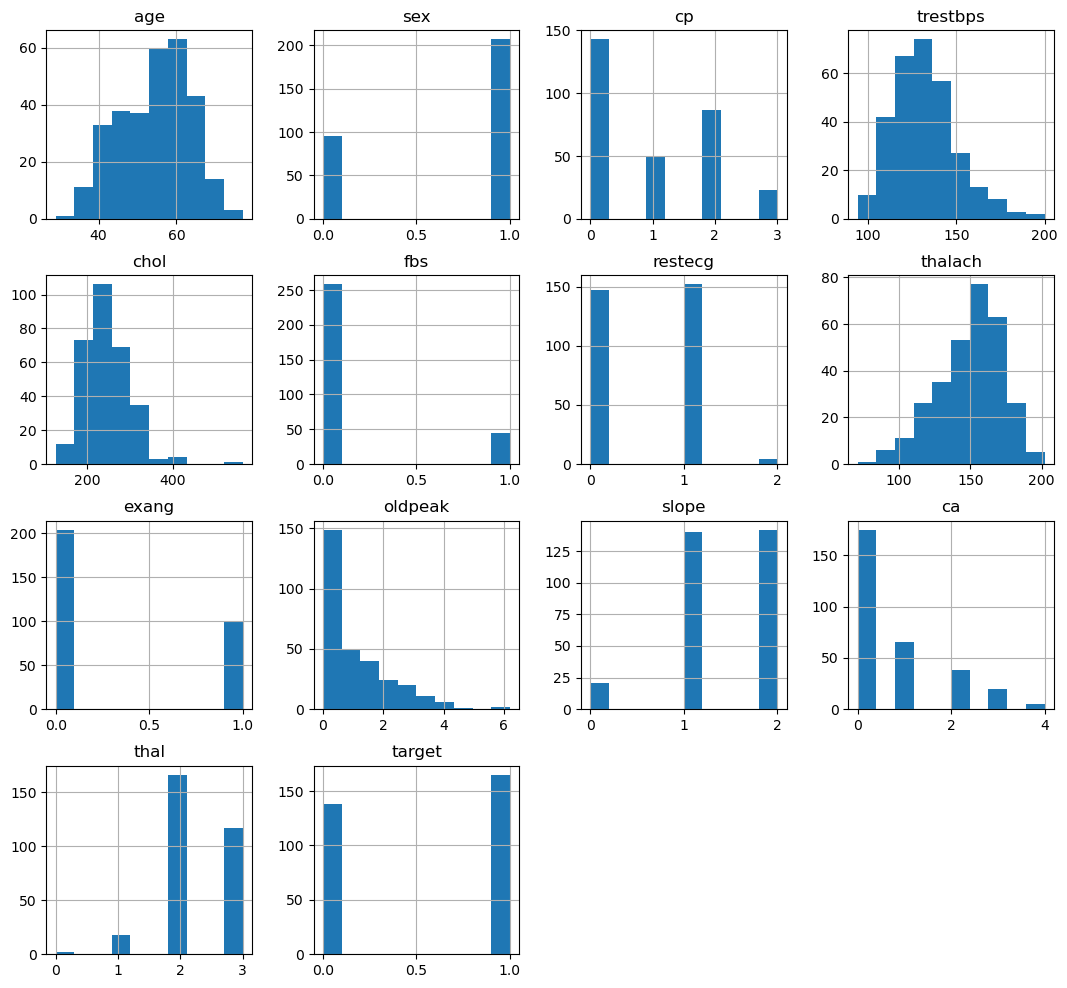

In [8]:
df.hist(figsize=(13, 12))

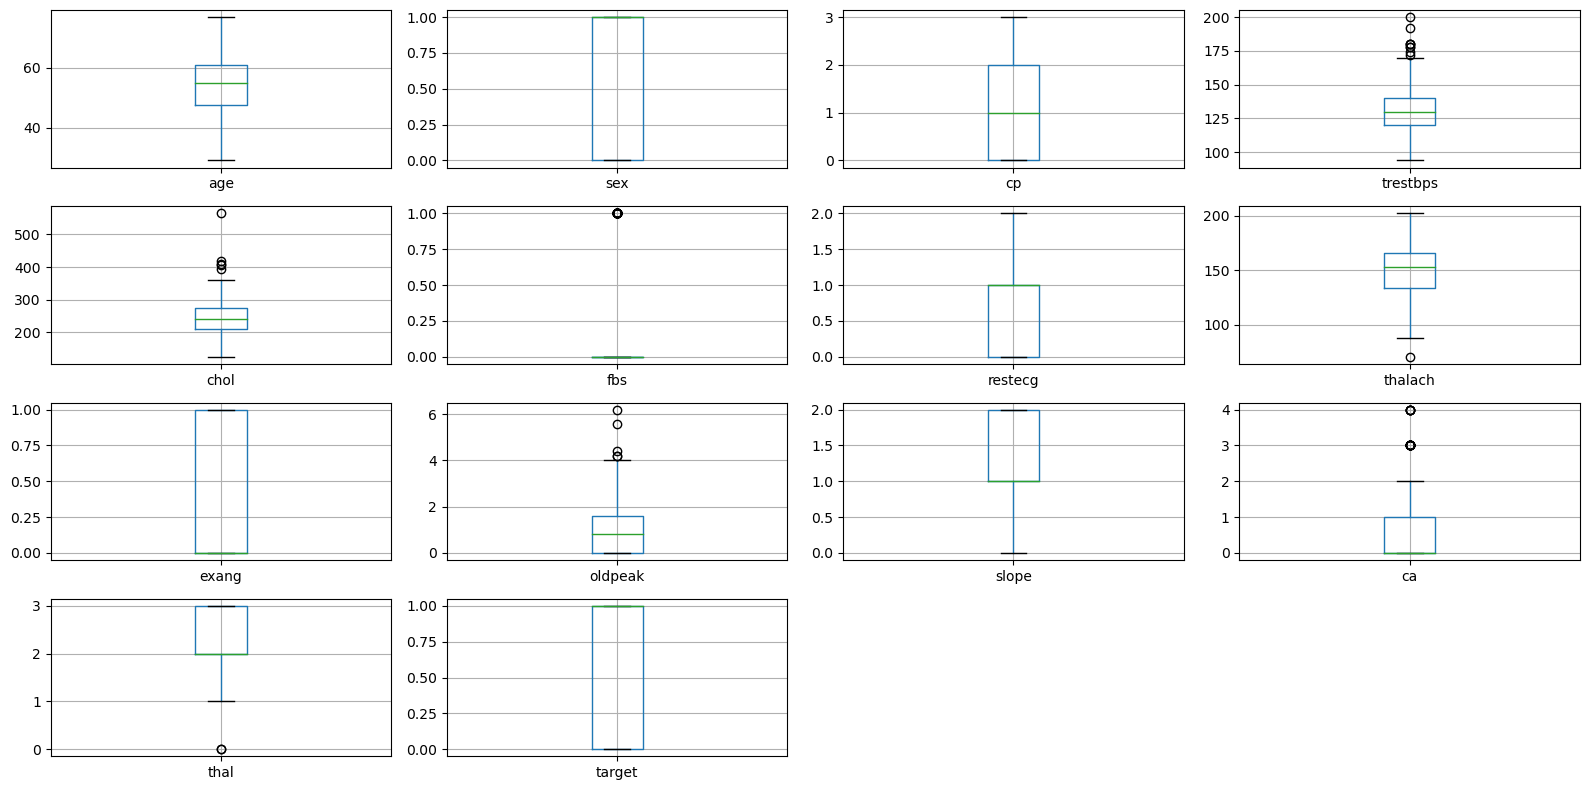

In [9]:
plt.figure(figsize=(16 , 8))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    df.boxplot(col)
    plt.tight_layout()

In [10]:
df.query("chol < 500", inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.324503,9.067887,29.0,47.25,55.0,61.0,77.0
sex,302.0,0.685430,0.465115,0.0,0.00,1.0,1.0,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.0,3.0
trestbps,302.0,131.678808,17.541015,94.0,120.00,130.0,140.0,200.0
chol,302.0,245.211921,48.567877,126.0,211.00,240.0,274.0,417.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.0,1.0
restecg,302.0,0.529801,0.525849,0.0,0.00,1.0,1.0,2.0
thalach,302.0,149.612583,22.935390,71.0,133.25,152.5,166.0,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.0,1.0
oldpeak,302.0,1.037748,1.162552,0.0,0.00,0.8,1.6,6.2


In [11]:
corr = df.corr()

<AxesSubplot:>

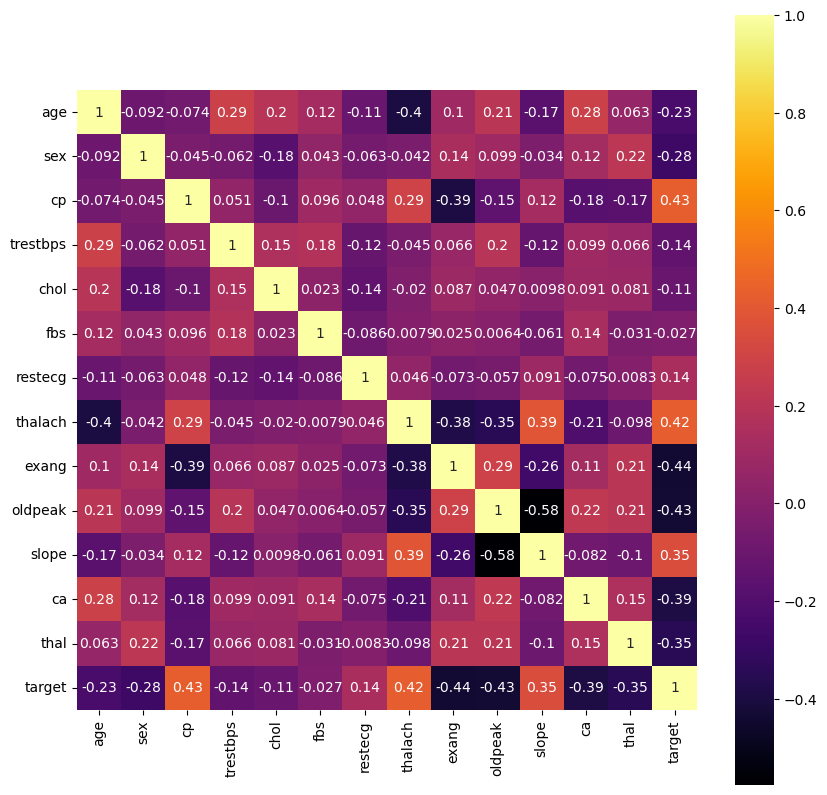

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

## Feature engineering

In [13]:
old_peak_sqrt = np.sqrt(df["oldpeak"])

<AxesSubplot:>

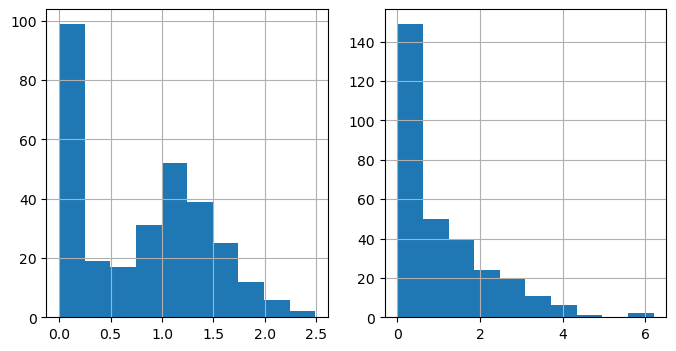

In [14]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
old_peak_sqrt.hist()

plt.subplot(1, 2, 2)
df["oldpeak"].hist()

In [15]:
df_gaus_feat = df.copy()
df_gaus_feat["oldpeak"] = np.sqrt(df_gaus_feat["oldpeak"])

corr = df_gaus_feat.corr()

<AxesSubplot:>

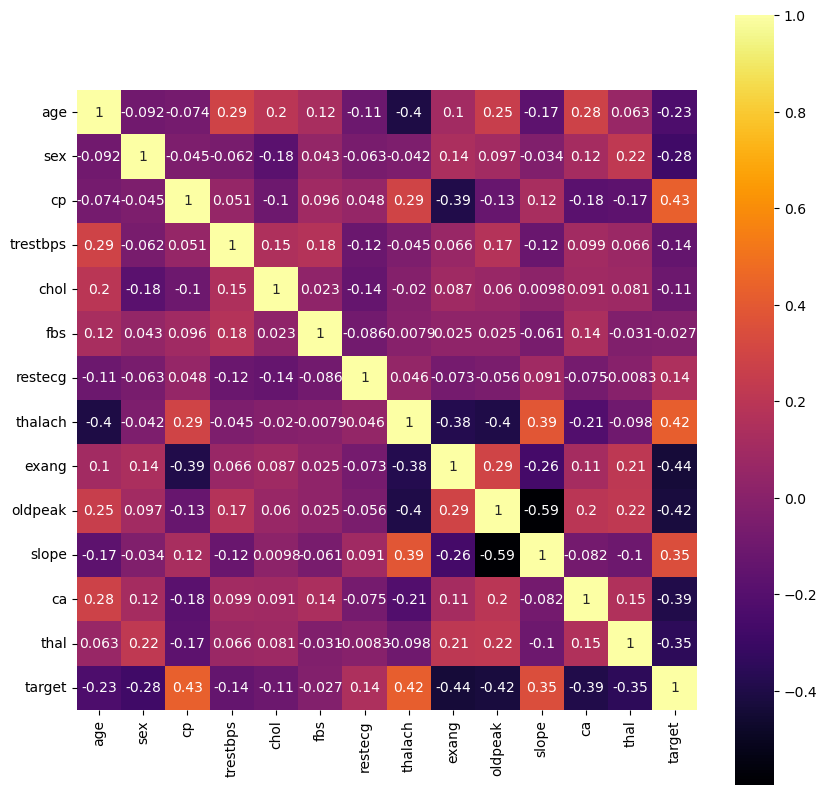

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

In [17]:
corr = df_gaus_feat.corr()
corr["target"].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.421096
slope       0.348569
restecg     0.140706
fbs        -0.026826
chol       -0.111147
trestbps   -0.142466
age        -0.230720
sex        -0.277867
thal       -0.348641
ca         -0.390431
oldpeak    -0.422939
exang      -0.435601
Name: target, dtype: float64

In [18]:
df_gaus_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,1.516575,0,0,1,1
1,37,1,2,130,250,0,1,187,0,1.870829,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.183216,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.894427,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.774597,2,0,2,1


## Feature selection

In [19]:
df_to_train = df_gaus_feat[["cp", "thalach", "slope", "age", "sex", "thal", "ca", "oldpeak", "exang", "target"]]

In [20]:
df_to_train.shape

(302, 10)

In [21]:
df_to_train.shape

(302, 10)

In [22]:
X = df_to_train[["cp", "thalach", "slope", "age", "sex", "thal", "ca", "oldpeak", "exang"]]
y = df_to_train[["target"]]

In [23]:
X.shape

(302, 9)

## Data preparation

In [24]:
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_min_max_scaled, y, test_size=0.20, random_state=42)

In [26]:
def plot_lost_history(history):
    plt.plot(history.epoch, history.history["accuracy"], 'b', label='Accuracy')
    plt.plot(history.epoch, history.history["val_accuracy"], 'y', label='Validation Accuracy')
    plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
    plt.plot(history.epoch, history.history["val_loss"], 'r', label='Validation loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.show()

In [27]:
tf.random.set_seed(42)

# Testing some neural networks configurations

In [28]:
def evaluate_model_accuracy_loss(model, X_test, y_test):
    test_results = model.evaluate(X_test, y_test["target"], verbose=1)
    print('Test results - Loss: {0} - Accuracy: {1}'.format(test_results[0], test_results[1] * 100))

Epoch 1/800


2022-10-11 19:49:57.501367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 16ms/step - loss: 0.6948 - accuracy: 0.5809 - val_loss: 0.6684 - val_accuracy: 0.6885
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.7344 - val_loss: 0.4573 - val_accuracy: 0.8525
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7884 - val_loss: 0.4544 - val_accuracy: 0.8197
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.8340 - val_loss: 0.3734 - val_accuracy: 0.8361
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8050 - val_loss: 0.3842 - val_accuracy: 0.8525
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8174 - val_loss: 0.3461 - val_accuracy: 0.8525
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7188

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8174 - val_loss: 0.3213 - val_accuracy: 0.8852
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7925 - val_loss: 0.3752 - val_accuracy: 0.8525
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8216 - val_loss: 0.4929 - val_accuracy: 0.7869
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.8091 - val_loss: 0.3181 - val_accuracy: 0.8689
Epoch 11/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7801 - val_loss: 0.3143 - val_accuracy: 0.8689
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8133 - val_loss: 0.3822 - val_accuracy: 0.8525
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8216 - val_loss: 0.3736 - val_accuracy: 0.8525
Epoch 14/800
8/8 [=================

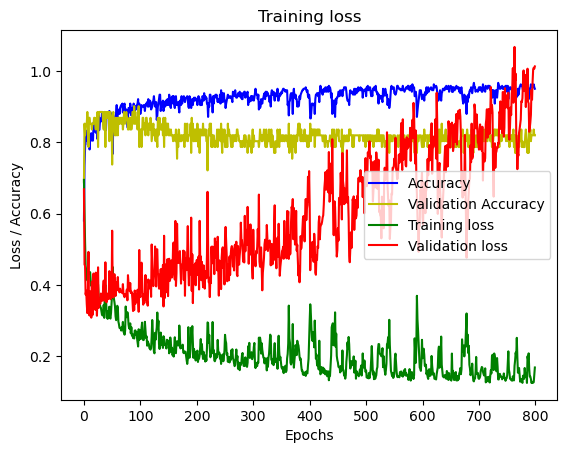

2/2 [==============================] - 0s 2ms/step - loss: 1.0129 - accuracy: 0.8197
Test results - Loss: 1.0129034519195557 - Accuracy: 81.96721076965332


In [29]:
first_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(2, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)

first_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.1),
    metrics=['accuracy']
)

first_history = first_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)

plot_lost_history(first_history)
evaluate_model_accuracy_loss(first_model, X_test, y_test)

Epoch 1/800


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 13ms/step - loss: 0.5906 - accuracy: 0.7261 - val_loss: 0.5543 - val_accuracy: 0.7213
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7469 - val_loss: 0.5007 - val_accuracy: 0.7541
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7552 - val_loss: 0.4517 - val_accuracy: 0.7377
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7759 - val_loss: 0.4609 - val_accuracy: 0.7541
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7925 - val_loss: 0.4066 - val_accuracy: 0.8361
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.7967 - val_loss: 0.4284 - val_accuracy: 0.7705
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7188

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7967 - val_loss: 0.3797 - val_accuracy: 0.8033
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8174 - val_loss: 0.3581 - val_accuracy: 0.8361
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8174 - val_loss: 0.3757 - val_accuracy: 0.8033
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.7967 - val_loss: 0.3487 - val_accuracy: 0.8361
Epoch 11/800
8/8 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.8216 - val_loss: 0.3333 - val_accuracy: 0.8361
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8133 - val_loss: 0.3362 - val_accuracy: 0.8361
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8216 - val_loss: 0.3459 - val_accuracy: 0.8361
Epoch 14/800
8/8 [=================

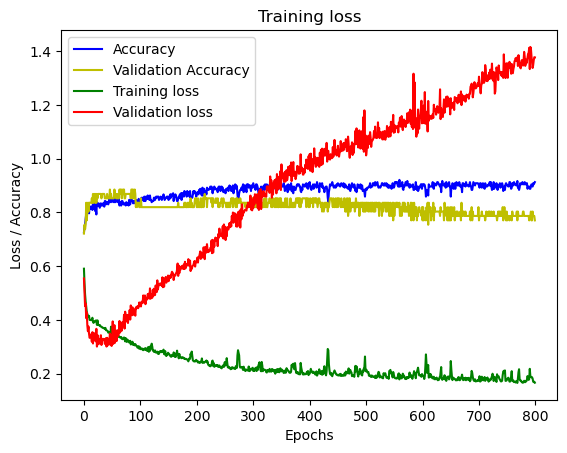

2/2 [==============================] - 0s 1ms/step - loss: 1.3771 - accuracy: 0.7705
Test results - Loss: 1.3770992755889893 - Accuracy: 77.04917788505554


In [30]:
second_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)

second_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)

second_history = second_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)

plot_lost_history(second_history)
evaluate_model_accuracy_loss(second_model, X_test, y_test)

Epoch 1/800


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 14ms/step - loss: 0.7013 - accuracy: 0.5477 - val_loss: 0.7044 - val_accuracy: 0.5082
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5519 - val_loss: 0.6923 - val_accuracy: 0.5082
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5560 - val_loss: 0.6827 - val_accuracy: 0.5082
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5477 - val_loss: 0.6749 - val_accuracy: 0.5246
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5685 - val_loss: 0.6691 - val_accuracy: 0.5738
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5768 - val_loss: 0.6647 - val_accuracy: 0.5738
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.5938

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5809 - val_loss: 0.6611 - val_accuracy: 0.5902
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.5851 - val_loss: 0.6580 - val_accuracy: 0.5902
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.5934 - val_loss: 0.6550 - val_accuracy: 0.6230
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6141 - val_loss: 0.6521 - val_accuracy: 0.6557
Epoch 11/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6390 - val_loss: 0.6497 - val_accuracy: 0.6885
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6473 - val_loss: 0.6471 - val_accuracy: 0.7213
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6473 - val_loss: 0.6432 - val_accuracy: 0.7377
Epoch 14/800
8/8 [=================

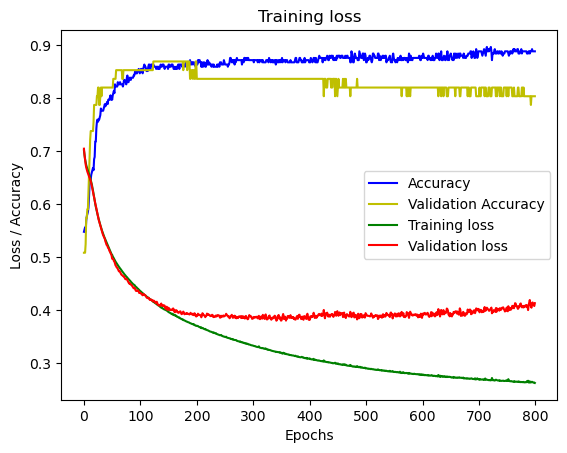

2/2 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8033
Test results - Loss: 0.4131035804748535 - Accuracy: 80.32786846160889


In [31]:
third_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)

third_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

third_history = third_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)

plot_lost_history(third_history)
evaluate_model_accuracy_loss(third_model, X_test, y_test)

Epoch 1/1200


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 14ms/step - loss: 0.7215 - accuracy: 0.5477 - val_loss: 0.7404 - val_accuracy: 0.5246
Epoch 2/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.5436 - val_loss: 0.7325 - val_accuracy: 0.5082
Epoch 3/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5436 - val_loss: 0.7260 - val_accuracy: 0.5082
Epoch 4/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.5353 - val_loss: 0.7200 - val_accuracy: 0.5082
Epoch 5/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5228 - val_loss: 0.7147 - val_accuracy: 0.5410
Epoch 6/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5270 - val_loss: 0.7096 - val_accuracy: 0.5410
Epoch 7/1200
1/8 [==>...........................] - ETA: 0s - loss: 0.6744 - accuracy: 0.5625

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5477 - val_loss: 0.7052 - val_accuracy: 0.5410
Epoch 8/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5519 - val_loss: 0.7012 - val_accuracy: 0.5410
Epoch 9/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5602 - val_loss: 0.6976 - val_accuracy: 0.5574
Epoch 10/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5768 - val_loss: 0.6939 - val_accuracy: 0.5738
Epoch 11/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6100 - val_loss: 0.6909 - val_accuracy: 0.6230
Epoch 12/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6100 - val_loss: 0.6876 - val_accuracy: 0.6557
Epoch 13/1200
8/8 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6141 - val_loss: 0.6840 - val_accuracy: 0.6721
Epoch 14/1200
8/8 [==========

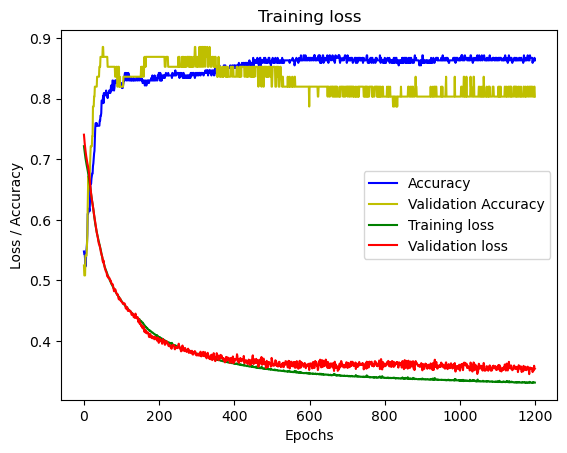

2/2 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8033
Test results - Loss: 0.3542463779449463 - Accuracy: 80.32786846160889


In [32]:
fourth_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)

fourth_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

fourth_history = fourth_model.fit(
    X_train, 
    y_train,
    epochs=1200,
    validation_data=(X_test, y_test)
)
plot_lost_history(fourth_history)
evaluate_model_accuracy_loss(fourth_model, X_test, y_test)

Epoch 1/800


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 14ms/step - loss: 0.7012 - accuracy: 0.2946 - val_loss: 0.6992 - val_accuracy: 0.2951
Epoch 2/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.3693 - val_loss: 0.6967 - val_accuracy: 0.4098
Epoch 3/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4232 - val_loss: 0.6948 - val_accuracy: 0.4918
Epoch 4/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5082
Epoch 5/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5477 - val_loss: 0.6917 - val_accuracy: 0.5246
Epoch 6/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5809 - val_loss: 0.6899 - val_accuracy: 0.6066
Epoch 7/800
1/8 [==>...........................] - ETA: 0s - loss: 0.6886 - accuracy: 0.6562

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.6224 - val_loss: 0.6875 - val_accuracy: 0.6885
Epoch 8/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6473 - val_loss: 0.6842 - val_accuracy: 0.7213
Epoch 9/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.6888 - val_loss: 0.6809 - val_accuracy: 0.7541
Epoch 10/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.7095 - val_loss: 0.6771 - val_accuracy: 0.7541
Epoch 11/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.7054 - val_loss: 0.6735 - val_accuracy: 0.7541
Epoch 12/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.7137 - val_loss: 0.6700 - val_accuracy: 0.7705
Epoch 13/800
8/8 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.7261 - val_loss: 0.6668 - val_accuracy: 0.7869
Epoch 14/800
8/8 [=================

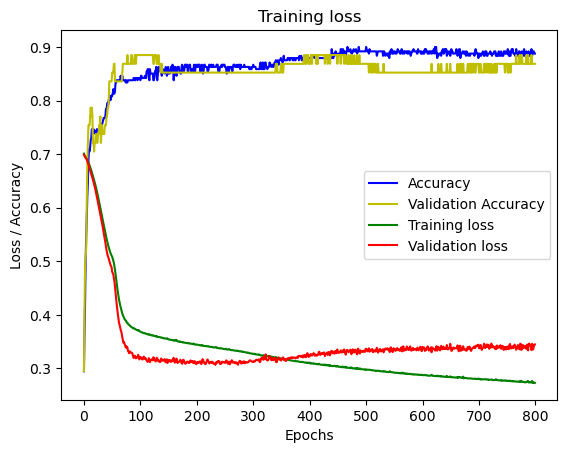

2/2 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8689
Test results - Loss: 0.34477826952934265 - Accuracy: 86.8852436542511


In [33]:
fifith_model = Sequential(
    [
        Dense(9, activation = "relu", name="L1"),
        Dense(3, activation = "relu", name="L2"),
        Dense(1, activation = "sigmoid", name="L3")
    ]
)

fifith_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

fifith_history = fifith_model.fit(
    X_train, 
    y_train,
    epochs=800,
    validation_data=(X_test, y_test)
)

plot_lost_history(fifith_history)
evaluate_model_accuracy_loss(fifith_model, X_test, y_test)

## Adding regularizations to neurons

In [34]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(9, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(3, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'sigmoid')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.001),
        metrics=['accuracy']
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000,
        validation_data=(X_test, y_test)
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 0.7194 - accuracy: 0.4523 - val_loss: 0.7134 - val_accuracy: 0.4754
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4523 - val_loss: 0.6975 - val_accuracy: 0.4754
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.4523 - val_loss: 0.6854 - val_accuracy: 0.4754
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.4523 - val_loss: 0.6759 - val_accuracy: 0.4754
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.4523 - val_loss: 0.6663 - val_accuracy: 0.4754
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.4523 - val_loss: 0.6587 - val_accuracy: 0.4754
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7036 - accuracy: 0.4375

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.4523 - val_loss: 0.6517 - val_accuracy: 0.4754
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.4564 - val_loss: 0.6442 - val_accuracy: 0.4754
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.4564 - val_loss: 0.6361 - val_accuracy: 0.4754
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.4564 - val_loss: 0.6300 - val_accuracy: 0.4754
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.4896 - val_loss: 0.6231 - val_accuracy: 0.5410
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.5892 - val_loss: 0.6161 - val_accuracy: 0.6230
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.6971 - val_loss: 0.6076 - val_accuracy: 0.6557
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 0.7308 - accuracy: 0.4979 - val_loss: 0.7195 - val_accuracy: 0.6557
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7216 - accuracy: 0.5892 - val_loss: 0.7123 - val_accuracy: 0.7049
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.6183 - val_loss: 0.7060 - val_accuracy: 0.6885
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.6307 - val_loss: 0.7006 - val_accuracy: 0.6885
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.6432 - val_loss: 0.6952 - val_accuracy: 0.6721
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.6598 - val_loss: 0.6902 - val_accuracy: 0.7377
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6947 - accuracy: 0.6250

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.7137 - val_loss: 0.6849 - val_accuracy: 0.8033
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.7676 - val_loss: 0.6801 - val_accuracy: 0.8033
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.7967 - val_loss: 0.6750 - val_accuracy: 0.8033
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.8008 - val_loss: 0.6696 - val_accuracy: 0.8361
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.8008 - val_loss: 0.6635 - val_accuracy: 0.8361
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.7759 - val_loss: 0.6571 - val_accuracy: 0.8852
Epoch 13/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.7676 - val_loss: 0.6505 - val_accuracy: 0.8525
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 0.7764 - accuracy: 0.6141 - val_loss: 0.7767 - val_accuracy: 0.5902
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.6307 - val_loss: 0.7662 - val_accuracy: 0.6721
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7541 - accuracy: 0.6639 - val_loss: 0.7552 - val_accuracy: 0.7213
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7457 - accuracy: 0.6639 - val_loss: 0.7461 - val_accuracy: 0.7049
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7397 - accuracy: 0.6598 - val_loss: 0.7383 - val_accuracy: 0.6885
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7332 - accuracy: 0.6515 - val_loss: 0.7320 - val_accuracy: 0.7049
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7447 - accuracy: 0.6875

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 0.7272 - accuracy: 0.6598 - val_loss: 0.7258 - val_accuracy: 0.7049
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7214 - accuracy: 0.6763 - val_loss: 0.7198 - val_accuracy: 0.7049
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.6805 - val_loss: 0.7136 - val_accuracy: 0.7213
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.6805 - val_loss: 0.7085 - val_accuracy: 0.7213
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.7051 - accuracy: 0.6888 - val_loss: 0.7030 - val_accuracy: 0.7377
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.6971 - val_loss: 0.6978 - val_accuracy: 0.7377
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.7095 - val_loss: 0.6919 - val_accuracy: 0.7377
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 18ms/step - loss: 1.3958 - accuracy: 0.4274 - val_loss: 1.3649 - val_accuracy: 0.3607
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3638 - accuracy: 0.4481 - val_loss: 1.3309 - val_accuracy: 0.3934
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3335 - accuracy: 0.4606 - val_loss: 1.2994 - val_accuracy: 0.4098
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3050 - accuracy: 0.4772 - val_loss: 1.2699 - val_accuracy: 0.4262
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2775 - accuracy: 0.4938 - val_loss: 1.2432 - val_accuracy: 0.4098
Epoch 6/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.2175 - accuracy: 0.6250

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 1.2510 - accuracy: 0.4979 - val_loss: 1.2179 - val_accuracy: 0.4098
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2264 - accuracy: 0.5062 - val_loss: 1.1938 - val_accuracy: 0.4426
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2022 - accuracy: 0.5104 - val_loss: 1.1700 - val_accuracy: 0.4426
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1778 - accuracy: 0.5436 - val_loss: 1.1462 - val_accuracy: 0.5082
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1532 - accuracy: 0.6100 - val_loss: 1.1232 - val_accuracy: 0.5246
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1305 - accuracy: 0.6058 - val_loss: 1.1012 - val_accuracy: 0.5246
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1081 - accuracy: 0.6183 - val_loss: 1.0807 - val_accuracy: 0.5410
Epoch 13/1000
8/8 [===========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 15ms/step - loss: 1.7059 - accuracy: 0.5104 - val_loss: 1.6781 - val_accuracy: 0.4262
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.6588 - accuracy: 0.5311 - val_loss: 1.6317 - val_accuracy: 0.4590
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.6133 - accuracy: 0.5560 - val_loss: 1.5871 - val_accuracy: 0.5082
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.5693 - accuracy: 0.5602 - val_loss: 1.5443 - val_accuracy: 0.5410
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5276 - accuracy: 0.5643 - val_loss: 1.5034 - val_accuracy: 0.5574
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4877 - accuracy: 0.5560 - val_loss: 1.4649 - val_accuracy: 0.5574
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.4737 - accuracy: 0.5625

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 1.4500 - accuracy: 0.5560 - val_loss: 1.4285 - val_accuracy: 0.5574
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4144 - accuracy: 0.5519 - val_loss: 1.3939 - val_accuracy: 0.5738
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3810 - accuracy: 0.5519 - val_loss: 1.3612 - val_accuracy: 0.5738
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3490 - accuracy: 0.5519 - val_loss: 1.3304 - val_accuracy: 0.5410
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3187 - accuracy: 0.5477 - val_loss: 1.3010 - val_accuracy: 0.5246
Epoch 12/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2897 - accuracy: 0.5477 - val_loss: 1.2731 - val_accuracy: 0.5246
Epoch 13/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.2622 - accuracy: 0.5477 - val_loss: 1.2463 - val_accuracy: 0.5246
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 16ms/step - loss: 3.1275 - accuracy: 0.5519 - val_loss: 3.0729 - val_accuracy: 0.5246
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.0249 - accuracy: 0.5477 - val_loss: 2.9729 - val_accuracy: 0.5246
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.9266 - accuracy: 0.5477 - val_loss: 2.8764 - val_accuracy: 0.5246
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.8314 - accuracy: 0.5477 - val_loss: 2.7838 - val_accuracy: 0.5246
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.7406 - accuracy: 0.5477 - val_loss: 2.6940 - val_accuracy: 0.5246
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.6531 - accuracy: 0.5477 - val_loss: 2.6081 - val_accuracy: 0.5246
Epoch 7/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.6142 - accuracy: 0.5625

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 2.5691 - accuracy: 0.5477 - val_loss: 2.5261 - val_accuracy: 0.5246
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.4888 - accuracy: 0.5477 - val_loss: 2.4478 - val_accuracy: 0.5246
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.4123 - accuracy: 0.5477 - val_loss: 2.3730 - val_accuracy: 0.5246
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3389 - accuracy: 0.5477 - val_loss: 2.3016 - val_accuracy: 0.5246
Epoch 11/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2687 - accuracy: 0.5477 - val_loss: 2.2332 - val_accuracy: 0.5246
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2017 - accuracy: 0.5477 - val_loss: 2.1675 - val_accuracy: 0.5246
Epoch 13/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1374 - accuracy: 0.5726 - val_loss: 2.1045 - val_accuracy: 0.6557
Epoch 14/1000
8/8 [==========

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 16ms/step - loss: 4.8230 - accuracy: 0.4523 - val_loss: 4.7123 - val_accuracy: 0.4754
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.6569 - accuracy: 0.4523 - val_loss: 4.5522 - val_accuracy: 0.4754
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.4981 - accuracy: 0.4523 - val_loss: 4.3975 - val_accuracy: 0.4754
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.3442 - accuracy: 0.4564 - val_loss: 4.2489 - val_accuracy: 0.4918
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.1975 - accuracy: 0.4606 - val_loss: 4.1059 - val_accuracy: 0.4918
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0557 - accuracy: 0.4689 - val_loss: 3.9690 - val_accuracy: 0.5082
Epoch 7/1000


/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 4ms/step - loss: 3.9202 - accuracy: 0.4938 - val_loss: 3.8375 - val_accuracy: 0.5082
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.7900 - accuracy: 0.5187 - val_loss: 3.7112 - val_accuracy: 0.5410
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.6652 - accuracy: 0.5394 - val_loss: 3.5896 - val_accuracy: 0.5246
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5444 - accuracy: 0.5643 - val_loss: 3.4730 - val_accuracy: 0.5738
Epoch 11/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.4291 - accuracy: 0.6266 - val_loss: 3.3609 - val_accuracy: 0.6230
Epoch 12/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.3179 - accuracy: 0.6598 - val_loss: 3.2531 - val_accuracy: 0.6885
Epoch 13/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.2114 - accuracy: 0.6598 - val_loss: 3.1492 - val_accuracy: 0.6885
Epoch 14/1000
8/8 [==========

MODEL:  0


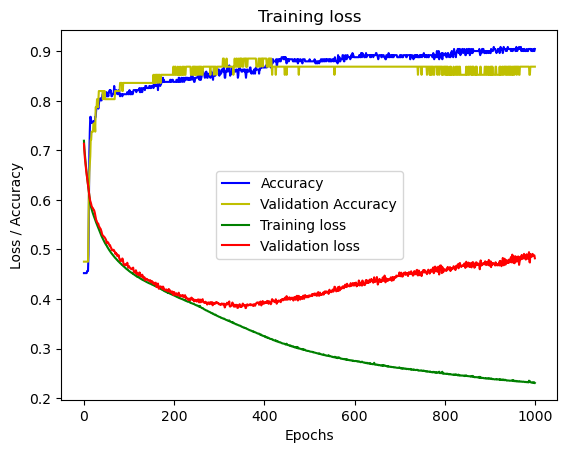

MODEL:  1


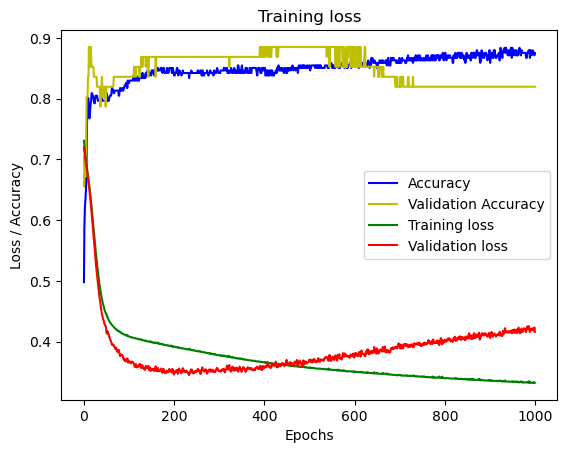

MODEL:  2


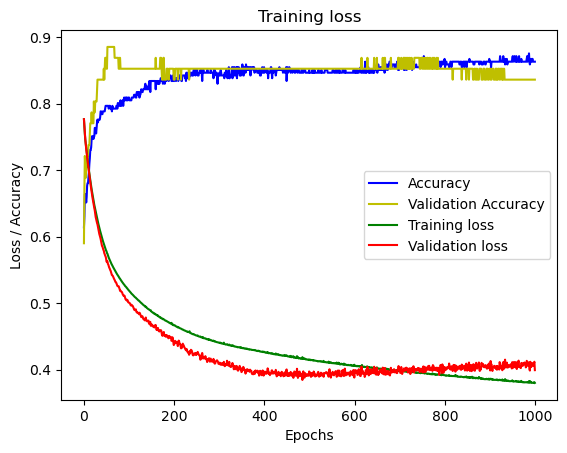

MODEL:  3


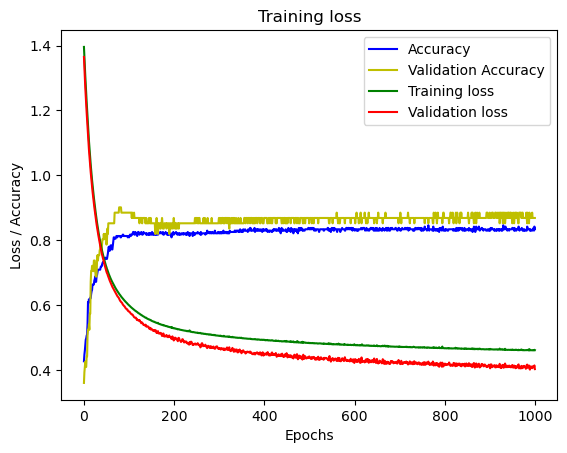

MODEL:  4


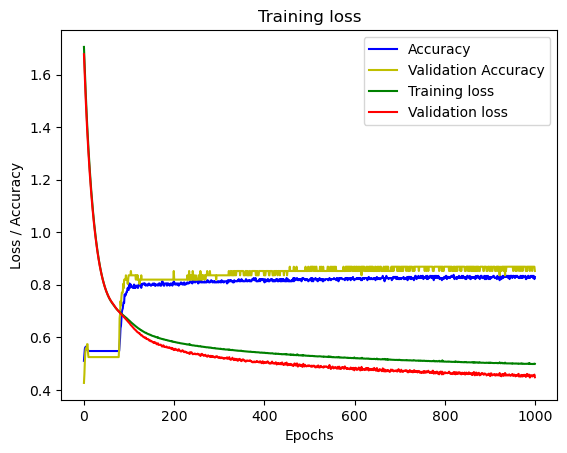

MODEL:  5


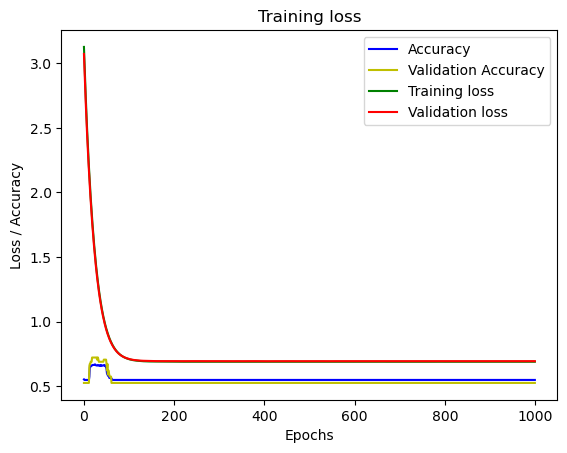

MODEL:  6


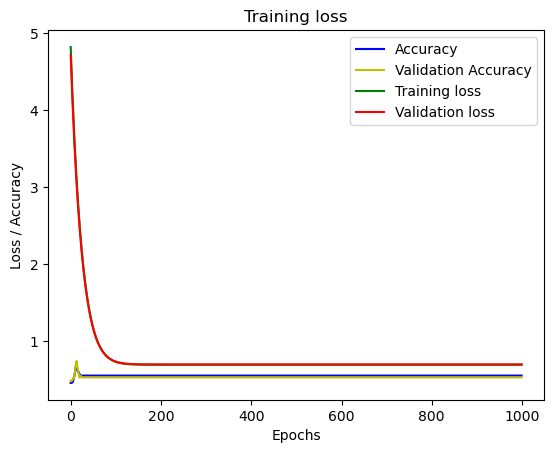

In [35]:
# models[0].history.epoch
for i in range(0, len(models)):
    print("MODEL: ", i)
    plot_lost_history(models[i].history)

In [36]:
for i in range(0, len(models)):
    print("MODEL: ", i)
    evaluate_model_accuracy_loss(models[i], X_test, y_test)

MODEL:  0
2/2 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.8689
Test results - Loss: 0.482197642326355 - Accuracy: 86.8852436542511
MODEL:  1
2/2 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8197
Test results - Loss: 0.4161151051521301 - Accuracy: 81.96721076965332
MODEL:  2
2/2 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8361
Test results - Loss: 0.3994238078594208 - Accuracy: 83.60655903816223
MODEL:  3
2/2 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8689
Test results - Loss: 0.40322768688201904 - Accuracy: 86.8852436542511
MODEL:  4
2/2 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8525
Test results - Loss: 0.44789397716522217 - Accuracy: 85.24590134620667
MODEL:  5
2/2 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5246
Test results - Loss: 0.6932180523872375 - Accuracy: 52.45901346206665
MODEL:  6
2

# Model selection and evaluating

In [37]:
def append_binary_results(y_test):
    results = []
    for i in range(len(y_test)):
        if y_test.iloc[i].predicted >= 0.55:
            results.append(1)
        else:
            results.append(0)
    
    return results

In [38]:
def evalute_model(y_test):
    
    print(confusion_matrix(y_test.target, y_test.target_predicted), "\n")
    print(classification_report(y_test.target, y_test.target_predicted))  

In [39]:
def plot_roc_curve(y_test):

    fp, tp, thresholds = roc_curve(y_test.target, y_test.target_predicted)

    plt.plot(fp, tp, color = 'red', label='ROC')
    plt.plot([0,1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Falso Positivo')

    plt.ylabel('Verdadeiro positivo')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()

## Model comparison

### Prefered models

In [40]:
model = models[1]

y_hat = model.predict(X_test)

y_test["predicted"] = y_hat
y_test["target_predicted"] = append_binary_results(y_test)

evalute_model(y_test)

2/2 [==============================] - 0s 1ms/step
[[26  3]
 [ 8 24]] 

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



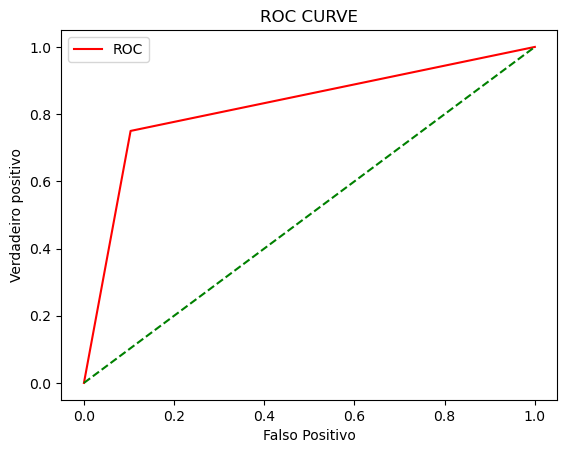

In [41]:
plot_roc_curve(y_test)

In [42]:
model = models[3]

y_hat = model.predict(X_test)

y_test["predicted"] = y_hat
y_test["target_predicted"] = append_binary_results(y_test)

evalute_model(y_test)

2/2 [==============================] - 0s 1ms/step
[[26  3]
 [ 6 26]] 

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



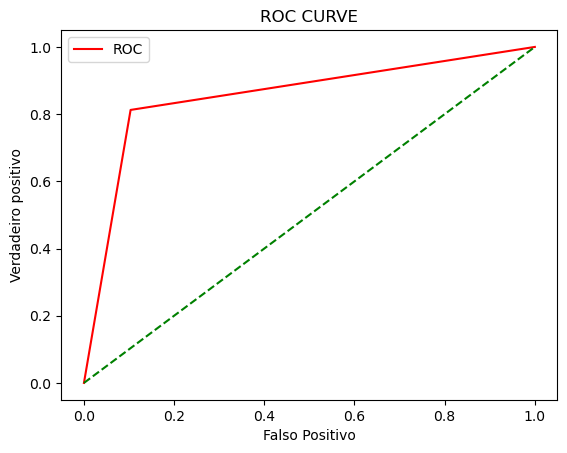

In [43]:
plot_roc_curve(y_test)

In [44]:
model = fifith_model
y_hat = model.predict(X_test)
y_test["predicted"] = y_hat
y_test["target_predicted"] = append_binary_results(y_test)

evalute_model(y_test)

2/2 [==============================] - 0s 1ms/step
[[27  2]
 [ 6 26]] 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



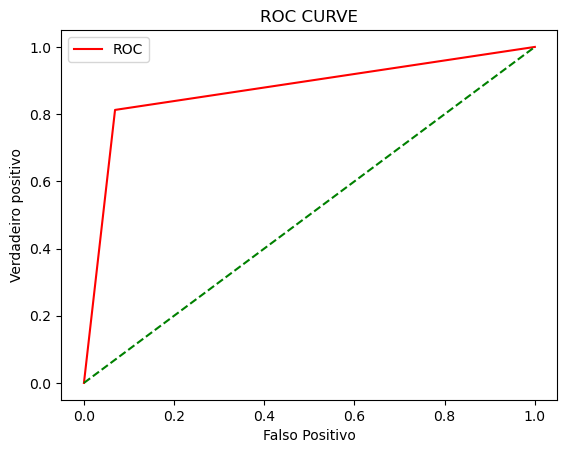

In [45]:
plot_roc_curve(y_test)